In [1061]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from collections import Counter
from ast import literal_eval
import itertools

In [929]:
# reading datasets
bb_usage = pd.read_csv("data/user_profile/BB_Usage_Categorical.csv")
voice_onnet_incoming_usage = pd.read_csv("data/user_profile/VOICE_ONNET_INCOMING_Usage_Categorical.csv")
voice_onnet_outgoing_usage = pd.read_csv("data/user_profile/VOICE_ONNET_OUTGOING_Usage_Categorical.csv")
voice_offnet_incoming_usage = pd.read_csv("data/user_profile/VOICE_OFFNET_INCOMING_Usage_Categorical.csv")
voice_offnet_outgoing_usage = pd.read_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Usage_Categorical.csv")
voice_IDD_incoming_usage = pd.read_csv("data/user_profile/VOICE_IDD_Incoming_Usage_Categorical.csv")
voice_IDD_outgoing_usage = pd.read_csv("data/user_profile/VOICE_IDD_Outgoing_Usage_Categorical.csv")
peo_tv_usage = pd.read_csv("data/user_profile/PEO_TV_Usage_Categorical.csv")

In [930]:
# locations
bb_location = pd.read_csv("data/user_profile/BB_USAGE_Locations_of_Users.csv")
voice_onnet_incoming_location = pd.read_csv("data/user_profile/VOICE_ONNET_INCOMING_Locations_of_Users.csv")
voice_onnet_outgoing_location = pd.read_csv("data/user_profile/VOICE_ONNET_OUTGOING_Locations_of_Users.csv")
voice_offnet_incoming_location = pd.read_csv("data/user_profile/VOICE_OFFNET_INCOMING_Locations_of_Users.csv")
voice_offnet_outgoing_location = pd.read_csv("data/user_profile/VOICE_OFFNET_OUTGOING_Locations_of_Users.csv")
voice_IDD_incoming_location = pd.read_csv("data/user_profile/VOICE_IDD_INCOMING_Locations_of_Users.csv")
peo_tv_location = pd.read_csv("data/user_profile/PEO_TV_Locations_of_Users.csv")

In [931]:
# user demographics
demo_df = pd.read_csv("data/user_profile/user_demographics_final.csv")

In [932]:
# VAS
voice_agg_df = pd.read_csv("data/user_profile/VAS_Voice_Aggregated.csv")
bb_agg_df = pd.read_csv("data/user_profile/VAS_BB_Aggregated.csv")
peo_agg_df = pd.read_csv("data/user_profile/VAS_Peo_Aggregated.csv")
other_agg_df = pd.read_csv("data/user_profile/VAS_Other_Aggregated.csv")

In [933]:
# Subscription Types
sub_df = pd.read_csv("data/user_profile/User_Subscription_Map.csv")
promo_change_df = pd.read_csv("data/user_profile/User_Subscription_Changes.csv")

In [934]:
#Extra GB Usage BB
extra_GB_df = pd.read_csv("data/user_profile/BB_extra_GB_usage.csv")

In [935]:
# All customers reference
all_users_df = pd.read_csv("data/user_profile/account_no_map_reduced.csv")

# Data perapration

In [936]:
all_users_df.drop(["Unnamed: 0"],axis=1,inplace=True)
all_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  27555 non-null  object
 1   ACCOUNT_NUM.hash   27555 non-null  object
 2   CUSTOMER_REF.hash  27555 non-null  object
dtypes: object(3)
memory usage: 645.9+ KB


In [937]:
bb_usage.rename(columns={'Unnamed: 0':'event_source.hash'}, inplace="True")
bb_usage = bb_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#bb_usage.drop_duplicates("event_source.hash", inplace=True)
bb_usage.drop([0,1], axis=0, inplace=True)
# bb_usage

In [938]:
voice_onnet_incoming_usage = voice_onnet_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_onnet_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_onnet_incoming_usage

In [939]:
voice_onnet_outgoing_usage = voice_onnet_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_onnet_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_onnet_outgoing_usage

In [940]:
voice_offnet_incoming_usage = voice_offnet_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_offnet_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_offnet_incoming_usage

In [941]:
voice_offnet_outgoing_usage = voice_offnet_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_offnet_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_offnet_outgoing_usage

In [942]:
voice_IDD_incoming_usage = voice_IDD_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier','incoming_country']]
voice_IDD_incoming_usage.rename(columns={"incoming_country":"IDD_incoming_country"}, inplace=True)
#voice_IDD_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_IDD_incoming_usage

In [943]:
voice_IDD_incoming_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   event_source.hash         1632 non-null   object 
 1   Usage_Rating_Categorical  1632 non-null   object 
 2   Usage_Rating_Scaled       1632 non-null   float64
 3   Outlier                   1632 non-null   object 
 4   IDD_incoming_country      1632 non-null   object 
dtypes: float64(1), object(4)
memory usage: 63.9+ KB


In [944]:
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier',"Revenue_on_Usage_Cumulative","outgoing_country"]]
voice_IDD_outgoing_usage.rename(columns={"outgoing_country":"IDD_outgoing_country","Revenue_on_Usage_Cumulative":"IDD_outgoing_Cumulative_Revenue"}, inplace=True)
#voice_IDD_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_IDD_outgoing_usage

In [945]:
voice_IDD_outgoing_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event_source.hash                517 non-null    object 
 1   Usage_Rating_Categorical         517 non-null    object 
 2   Usage_Rating_Scaled              517 non-null    float64
 3   Outlier                          517 non-null    object 
 4   IDD_outgoing_Cumulative_Revenue  517 non-null    int64  
 5   IDD_outgoing_country             517 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 24.4+ KB


In [946]:
peo_tv_usage = peo_tv_usage[['Phone_Number.hash','Peo_TV_Package','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#peo_tv_usage.drop_duplicates("Phone_Number.hash", inplace=True)
#peo_tv_usage

In [947]:
# user location 
print(bb_location.shape)
print(voice_onnet_incoming_location.shape)
print(voice_onnet_outgoing_location.shape)
print(voice_offnet_incoming_location.shape)
print(voice_offnet_outgoing_location.shape)
print(voice_IDD_incoming_location.shape)
print(peo_tv_location.shape)

(1306, 3)
(3236, 3)
(3307, 3)
(3329, 3)
(3191, 3)
(1632, 3)
(1428, 4)


In [948]:
# location from voice onnet outgoing
# justification: this has the max no of subscribers
voice_onnet_outgoing_location = voice_onnet_outgoing_location[['event_source.hash','Location_Identifier']]
voice_onnet_outgoing_location.drop_duplicates("event_source.hash", inplace=True)
#voice_onnet_outgoing_location

In [949]:
demo_df.drop(["Unnamed: 0"], axis=1,inplace=True)

# User Profile : Usage

In [950]:
usage_df = all_users_df.merge(voice_onnet_outgoing_usage,how='left', on='event_source.hash')

In [951]:
usage_df = usage_df.merge(voice_onnet_incoming_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical_x':'ONNET_OUTGOING_Categorical', 'Usage_Rating_Categorical_y':'ONNET_INCOMING_Categorical',
                         'Usage_Rating_Scaled_x':'ONNET_OUTGOING_Scaled','Usage_Rating_Scaled_y':'ONNET_INCOMING_Scaled',
                         'Outlier_x':'ONNET_OUTGOING_Outlier','Outlier_y':'ONNET_INCOMING_Outlier'}, inplace="True")

In [952]:
usage_df = usage_df.merge(voice_offnet_outgoing_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'OFFNET_OUTGOING_Categorical','Usage_Rating_Scaled':'OFFNET_OUTGOING_Scaled', 'Outlier':'OFFNET_OUTGOING_Outlier'}, inplace="True")

In [953]:
usage_df = usage_df.merge(voice_offnet_incoming_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'OFFNET_INCOMING_Categorical','Usage_Rating_Scaled':'OFFNET_INCOMING_Scaled','Outlier':'OFFNET_INCOMING_Outlier'}, inplace="True")

In [954]:
usage_df = usage_df.merge(voice_IDD_incoming_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_INCOMING_Categorical','Usage_Rating_Scaled':'IDD_INCOMING_Scaled','Outlier':'IDD_INCOMING_Outlier'}, inplace="True")

In [955]:
usage_df = usage_df.merge(voice_IDD_outgoing_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_OUTGOING_Categorical','Usage_Rating_Scaled':'IDD_OUTGOING_Scaled','Outlier':'IDD_OUTGOING_Outlier'}, inplace="True")

In [956]:
usage_df = usage_df.merge(peo_tv_usage,how='left', left_on='event_source.hash', right_on='Phone_Number.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'PEO_TV_Categorical','Usage_Rating_Scaled':'PEO_TV_Scaled'}, inplace="True")
usage_df.drop('Phone_Number.hash', axis=1, inplace=True)

In [957]:
# merege BB usage
usage_df = usage_df.merge(bb_usage,how='left', on='event_source.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'BB_Categorical','Usage_Rating_Scaled':'BB_Scaled'}, inplace="True")

In [958]:
# merge user location identifier
usage_df = usage_df.merge(voice_onnet_outgoing_location,how='left', on='event_source.hash')

# Adding New Data

### Adding demographics

In [960]:
demo_df.drop(["CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [961]:
usage_df = usage_df.merge(demo_df,how='left', on='event_source.hash')

In [962]:
usage_df[["BIRTH_YEAR","AGE"]].describe()

,BIRTH_YEAR,AGE
count,4104.000000,4104.000000
mean,1964.109893,56.890107
std,15.177714,15.177714
min,1900.000000,20.000000
25%,1953.000000,45.000000
50%,1965.000000,56.000000
75%,1976.000000,68.000000
max,2001.000000,121.000000


<AxesSubplot:ylabel='Density'>

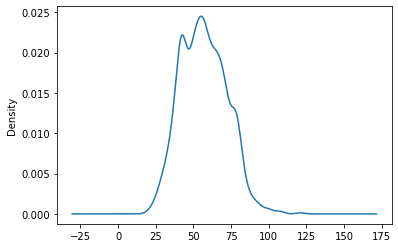

In [963]:
usage_df["AGE"].plot(kind = 'density')

<AxesSubplot:ylabel='Density'>

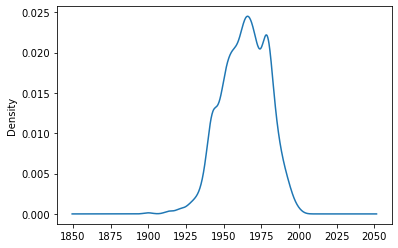

In [964]:
usage_df["BIRTH_YEAR"].plot(kind = 'density')

### Demographic Information

- 2266 users have demographic info (age, Birth Year, Gender)
- Users born from **1900**-2000 
- Age vary from 21 y.o. to **121 y.o**
- Mean Age - 56 y.o
- 75% of users are less than 67 y.o.
- Mostly middle aged, and aged customers

## Voice Usage Bins

In [965]:
usage_df["ONNET_INCOMING_Categorical"].value_counts()

LOW       1673
MEDIUM    1224
HIGH       145
Name: ONNET_INCOMING_Categorical, dtype: int64

In [966]:
def voice_bin(incoming,outgoing):
    if incoming=="LOW" and outgoing=="LOW":
        return "LOW"
    if incoming=="HIGH" and outgoing=="HIGH":
        return "HIGH"
    if (incoming=="HIGH" and outgoing=="MEDIUM") or (incoming=="MEDIUM" and outgoing=="HIGH"):
        return "HIGH"
    if incoming=="MEDIUM" and outgoing=="MEDIUM":
        return "MEDIUM"
    if (incoming=="MEDIUM" and outgoing=="LOW") or (incoming=="LOW" and outgoing=="MEDIUM"):
        return "LOW"
    if (incoming=="LOW" and outgoing=="HIGH") or (incoming=="HIGH" and outgoing=="LOW"):
        return "MEDIUM"
    if (isinstance(incoming,float) and not isinstance(outgoing,float)) or (not isinstance(incoming,float) and isinstance(outgoing,float)):
        return "LOW"

In [967]:
# test
voice_bin("LOW","HIGH")

'MEDIUM'

In [968]:
usage_df["ONNET_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["ONNET_INCOMING_Categorical"], x["ONNET_OUTGOING_Categorical"]), axis=1)

In [969]:
usage_df["OFFNET_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["OFFNET_INCOMING_Categorical"], x["OFFNET_OUTGOING_Categorical"]), axis=1)

In [970]:
usage_df["IDD_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["IDD_INCOMING_Categorical"], x["IDD_OUTGOING_Categorical"]), axis=1)

In [971]:
def voice_overall_bin(call_usage):
    counts = Counter(call_usage)
    if counts["LOW"] > 1:
        return "LOW"
    elif counts["HIGH"] > 1:
        return "HIGH"
    elif counts["MEDIUM"] > 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1:
        return "LOW"
    elif counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"

In [972]:
# test
voice_overall_bin(["HIGH","HIGH","NO"])

'HIGH'

In [973]:
usage_df["VOICE_Categorical"] = usage_df.apply(lambda x: voice_overall_bin([x["ONNET_Overall_Categorical"], x["OFFNET_Overall_Categorical"], x["IDD_Overall_Categorical"]]), axis=1)

In [974]:
usage_df[(usage_df["VOICE_Categorical"] == "NO")]

,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash,ONNET_OUTGOING_Categorical,ONNET_OUTGOING_Scaled,ONNET_OUTGOING_Outlier,ONNET_INCOMING_Categorical,ONNET_INCOMING_Scaled,ONNET_INCOMING_Outlier,OFFNET_OUTGOING_Categorical,...,BB_Categorical,BB_Scaled,Location_Identifier,GENDER,BIRTH_YEAR,AGE,ONNET_Overall_Categorical,OFFNET_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical


## Subscrition Types

In [975]:
sub_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [976]:
usage_df = usage_df.merge(sub_df,how='left',on=["event_source.hash"])

In [977]:
def check_product_level(voice,bb,tv):
    if voice!="NO": 
        if bb=="NO" and tv=="NO":
            return "SINGLE_PLAY"
        if bb != "NO" and tv == "NO":
            return "DOUBLE_PLAY_BV"
        if bb == "NO" and tv != "NO":
            return "DOUBLE_PLAY_PV"
        if bb != "NO" and tv != "NO":
            return "TRIPLE_PLAY"
    else:
        return "NO"

In [978]:
# test
check_product_level("LOW","HIGH","NO")

'DOUBLE_PLAY_BV'

In [979]:
usage_df["Play_Type"] = usage_df.apply(lambda x: check_product_level(x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]), axis=1)

In [980]:
# play usage
def play_usage(usage):
    if len(usage)>2:
        return [f"VOICE_{usage[0]}", f"BB_{usage[1]}", f"TV_{usage[2]}"]
    else:
        return "ERR"

In [981]:
# test
play_usage(["LOW","HIGH","LOW"])

['VOICE_LOW', 'BB_HIGH', 'TV_LOW']

In [982]:
usage_df["Sub_Usage"] = usage_df.apply(lambda x: play_usage([x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]]), axis=1)

In [983]:
usage_df[["Sub_Type","Play_Type"]].value_counts()

Sub_Type        Play_Type     
DOUBLE_PLAY_BV  TRIPLE_PLAY       9088
DOUBLE_PLAY_PV  TRIPLE_PLAY       6623
SINGLE_PLAY     TRIPLE_PLAY       2291
TRIPLE_PLAY     TRIPLE_PLAY       2096
4G              TRIPLE_PLAY        102
SINGLE_PLAY     DOUBLE_PLAY_BV      28
DOUBLE_PLAY_BV  DOUBLE_PLAY_BV      27
TRIPLE_PLAY     DOUBLE_PLAY_BV      19
DOUBLE_PLAY_PV  DOUBLE_PLAY_BV      12
dtype: int64

In [984]:
def check_sub_type(sub):
    if isinstance(sub, float):
        return "Assumed"
    else:
        return "Actual"

In [985]:
usage_df["Sub_Type_State"]=usage_df["Sub_Type"].apply(lambda x: check_sub_type(x))

In [986]:
def merge_sub_types(sub1,sub2):
    if isinstance(sub1, float):
        return sub2
    else:
        return sub1

In [987]:
usage_df["Sub_Type"] = usage_df.apply(lambda x: merge_sub_types(x["Sub_Type"], x["Play_Type"]), axis=1)

In [988]:
usage_df.drop(["Play_Type"],axis=1,inplace=True)

In [989]:
usage_df["Sub_Type_State"].value_counts()

Actual     20286
Assumed     7269
Name: Sub_Type_State, dtype: int64

In [990]:
usage_df["Sub_Type"].value_counts()

DOUBLE_PLAY_BV    9251
TRIPLE_PLAY       9248
DOUBLE_PLAY_PV    6635
SINGLE_PLAY       2319
4G                 102
Name: Sub_Type, dtype: int64

### Note

- Actual Subscription information - for **811** Subscribers only
- Assumed on usage - **2496**

## Service Packages and VAS
- categories derived from "Product State Changes" and "VAS" datasets

In [991]:
voice_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)
bb_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)
peo_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)
other_agg_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [992]:
usage_df = usage_df.merge(voice_agg_df,how='left', on='event_source.hash')

In [993]:
usage_df = usage_df.merge(bb_agg_df,how='left', on='event_source.hash')
usage_df = usage_df.merge(peo_agg_df,how='left', on='event_source.hash')
usage_df = usage_df.merge(other_agg_df,how='left', on='event_source.hash')
usage_df.drop(['VAS_Count_x','VAS_Count_y'], axis=1, inplace=True)

## Subscription upgrades and Downgrades

In [994]:
promo_change_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash"],axis=1, inplace=True)

In [995]:
promo_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19648 entries, 0 to 19647
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  19648 non-null  object
 1   Sub_Update_Date    19648 non-null  object
 2   Sub_Update_Status  19648 non-null  object
 3   Sub_Update         19648 non-null  object
dtypes: object(4)
memory usage: 614.1+ KB


In [996]:
usage_df = usage_df.merge(promo_change_df,how='left', on='event_source.hash')

In [997]:
usage_df[["Sub_Update_Status","Sub_Update"]].value_counts()

Sub_Update_Status    Sub_Update                      
Promotion Upgrade    SINGLE_PLAY -> DOUBLE_PLAY_BV       8571
                     SINGLE_PLAY -> DOUBLE_PLAY_PV       6521
Promotion Downgrade  DOUBLE_PLAY_BV -> SINGLE_PLAY       2052
Promotion Upgrade    DOUBLE_PLAY_PV -> TRIPLE_PLAY       1541
                     DOUBLE_PLAY_BV -> TRIPLE_PLAY        376
Promotion Downgrade  DOUBLE_PLAY_PV -> SINGLE_PLAY        197
                     TRIPLE_PLAY -> DOUBLE_PLAY_PV        111
Promotion Upgrade    4G -> 4G                             102
                     SINGLE_PLAY -> TRIPLE_PLAY            80
Promotion Downgrade  TRIPLE_PLAY -> SINGLE_PLAY            66
                     TRIPLE_PLAY -> DOUBLE_PLAY_BV         29
Promotion Upgrade    DOUBLE_PLAY_PV -> DOUBLE_PLAY_BV       2
dtype: int64

<AxesSubplot:ylabel='None'>

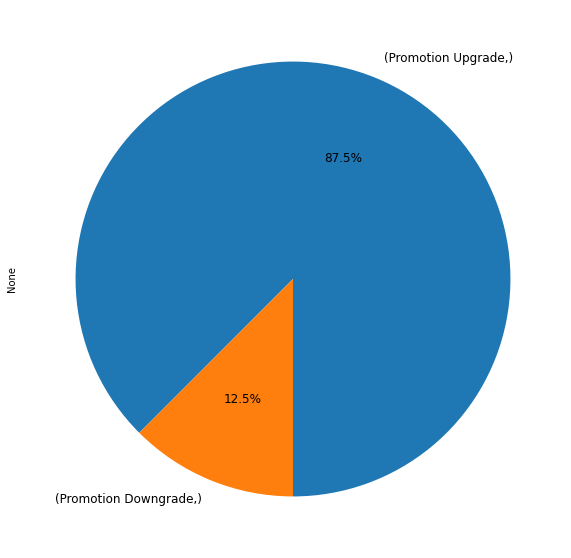

In [998]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
usage_df[["Sub_Update_Status"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12)

## BB Extra GB Purchased

In [999]:
extra_GB_df.drop(["Unnamed: 0","CUSTOMER_REF.hash","ACCOUNT_NUM.hash","VAS"],axis=1, inplace=True)
extra_GB_df.rename(columns={"Month_Subscribed":"BB_Extra_GB_Purchased_Month","Rental":"BB_Extra_GB_Rental"}, inplace=True)

In [1000]:
extra_GB_df["BB_Extra_GB_Purchased_Times"]= 1

In [1001]:
extra_GB_agg_df = extra_GB_df.groupby('event_source.hash', as_index=False).agg(list)

In [1002]:
extra_GB_agg_df['BB_Extra_GB_Purchased_Times'] = extra_GB_agg_df.apply(lambda x: len(x['BB_Extra_GB_Purchased_Times']), axis=1)

In [1003]:
def list_zipper(list1,list2):
    return dict(zip(list1,list2))

In [1004]:
extra_GB_agg_df['BB_Extra_GB_Month_vs_Rental'] = extra_GB_agg_df.apply(lambda x: list_zipper(x['BB_Extra_GB_Purchased_Month'],x['BB_Extra_GB_Rental']), axis=1)

In [1005]:
extra_GB_agg_df.drop(["BB_Extra_GB_Purchased_Month","BB_Extra_GB_Rental"],axis=1, inplace=True)

In [1006]:
scaler = MinMaxScaler()
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"] = scaler.fit_transform(extra_GB_agg_df["BB_Extra_GB_Purchased_Times"].values.reshape(-1,1))

In [1007]:
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"] = extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"].apply(lambda x: 0.01 if x==0.0 else x)

In [1008]:
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"].describe()

count    314.000000
mean       0.119357
std        0.174249
min        0.010000
25%        0.018868
50%        0.037736
75%        0.150943
max        1.000000
Name: BB_Extra_GB_Purchased_Scaled, dtype: float64

In [1009]:
# binning
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
extra_GB_agg_df['BB_Extra_GB_Purchase_Categorical'] = pd.cut(extra_GB_agg_df['BB_Extra_GB_Purchased_Scaled'], bins=bins, labels=labels)

In [1010]:
extra_GB_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   event_source.hash                 314 non-null    object  
 1   BB_Extra_GB_Purchased_Times       314 non-null    int64   
 2   BB_Extra_GB_Month_vs_Rental       314 non-null    object  
 3   BB_Extra_GB_Purchased_Scaled      314 non-null    float64 
 4   BB_Extra_GB_Purchase_Categorical  314 non-null    category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 12.7+ KB


In [1011]:
usage_df = usage_df.merge(extra_GB_agg_df,how='left', on='event_source.hash')

### Notes
- Extra GB usage information only present about **314** unique customers
- Information available for only **33** customers from the selected 3307 sample

# Deriving Contextual Features

## Socio-Economic features

In [1012]:
usage_df["Other_VAS_Package"].unique()

array(["['P-Basic1_Tele Life', 'C_Sisu Connect']", nan,
       "['P_Sisu Connect']", "['P-Basic1_Tele Life', 'P_Sisu Connect']",
       "['P-Plus1_Tele Life']", "['AB_Megaline', 'AB_Megaline Startup']",
       "['P-Basic1_Tele Life']", "['P-Basic1_Tele Life', 'E_TSTV']",
       "['AB_Service Vacation']",
       "['AB_Megaline', 'AB_Megaline Startup', 'AB_Relocation']",
       "['E_TSTV']", "['Package Rental Through ADSL']",
       "['AB_Megaline Startup', 'AB_Megaline']",
       "['AB_Megaline', 'E_TSTV']", "['Meet Lite']",
       "['P_Sisu Connect', 'P-Basic1_Tele Life']", "['AB_Megaline']",
       "['P-Plus1_Tele Life', 'E_TSTV']",
       "['P-Basic1_Tele Life', 'Meet Lite']",
       "['AB_Copper Access Bearer', 'AB_Megaline', 'AB_Megaline Startup']",
       "['AB_Referral offer Discount', 'E_Referral offer Discount']",
       "['P_Sisu Connect', 'P-Plus4_Tele Life']",
       "['AB_Megaline', 'AB_Relocation']",
       "['AB_Megaline', 'AB_Rental Free']",
       "['AB_Copper Access Be

In [1013]:
usage_df["Voice_VAS_Package"].unique()

array([nan, "['V_Sisu Connect']",
       "['V_Abbreviated Dialing', 'V_Call Forwarding', 'V_Call Forwarding-Immediate', 'V_Call Forwarding-On Busy', 'V_Call Forwarding-No Answer', 'V_Absentee service', 'V_Call Transfer Three way', 'V_Call Waiting']",
       "['V_Single VAS Bundle', 'V_IDD', 'V_DQ Contact Details', 'V_Call Forwarding-No Answer', 'V_Call Forwarding-On Busy', 'V_Call Forwarding-Immediate', 'V_Call Waiting', 'V_Call Forwarding', 'V_Call Transfer Three way', 'V_Abbreviated Dialing', 'V_SLT CLI', 'V_Absentee service']",
       "['V-Basic1_TeleLife', 'V_Absentee service', 'V_Abbreviated Dialing', 'V_Call Forwarding-No Answer', 'V_Call Forwarding-On Busy', 'V_Call Transfer Three way', 'V_Call Forwarding', 'V_Call Waiting', 'V_Call Forwarding-Immediate']",
       "['V-Basic1_TeleLife', 'V_Call Waiting', 'V_Call Forwarding', 'V_Call Forwarding-Immediate', 'V_Abbreviated Dialing', 'V_Call Forwarding-On Busy', 'V_Call Forwarding-No Answer', 'V_Absentee service', 'V_Call Transfer T

In [1014]:
usage_df["Peo_VAS_Package"].unique()

array([nan, "['PEO TV GO_OTT_A-la carte channels']",
       "['BB_PeoTVGO Revenue code']", "['E_Video on Demand']",
       "['E_PeoTV Initiation', 'E_Video on Demand']",
       "['E_Video on Demand', 'E_PeoTV Initiation']",
       "['E_Video on Demand', 'E_SLT PeoTV Service']",
       "['PeoTVGo_Channel Package']",
       "['E_PeoTV Initiation', 'E_SLT PeoTV Service', 'E_Video on Demand']",
       "['E_SLT PeoTV Service', 'E_Video on Demand']",
       "['PEO TV GO_OTT_A-la carte channels', 'E_PeoTV Initiation', 'E_Video on Demand']",
       "['OTT_SLT PeoTV Go', 'PeoTVGo_Channel Package']",
       "['PeoTVGo_Channel Package', 'PEO TV GO_OTT_A-la carte channels']",
       "['E_Video on Demand', 'E_PeoTV Initiation', 'E_SLT PeoTV Service']",
       "['E_PeoTV Initiation', 'E_Video on Demand', 'E_SLT PeoTV Service']",
       "['E_Video on Demand', 'PEO TV GO_OTT_A-la carte channels']",
       "['PeoTVGo_Channel Package', 'BB_PeoTVGO Revenue code', 'PEO TV GO_OTT_A-la carte channels']"],
 

In [1016]:
usage_df["Peo_TV_Package"].unique()

array([nan, 'PEO_SILVER', 'PEO_SILVER_PLUS', 'PEO_RELIGIOUS_PACKAGE',
       'NEW_SLT_STAFF_PACKAGE', 'PEO_UTHAYAM', 'PEO_TITANIUM',
       'PEO_UNNATHAM', 'PRANAMA', 'LOTUS', 'PEO_ENTERTAINMENT',
       'PEO_SILVER_PLUS_FTTH', 'SLTStaff_PEO_SILVER', 'PEO_PLATINUM',
       'DOUBLEPROMO', 'NEW_YEAR_TREAT', 'PEO_FAMILY', 'PEO_GOLD',
       'PEO_SILVER_FTTH', 'LEISURE_SPORTS', 'BOC',
       'SLT_STAFF_PEO_UNNATHAM_FTTH', 'SLT_STAFF_TRIPLE_PLAY'],
      dtype=object)

### Having an Insurance?

In [1017]:
def having_insurance(other,voice):
    insurrence_VAS = ["V_Telehealth","V-Basic4_TeleLife","V-Plus4_TeleLife","V-Plus1_TeleLife","V-Basic1_TeleLife","P-Basic1_Tele Life","P-Plus1_Tele Life","P-Basic2_Tele Life","C-Basic1_Tele Life","P-Plus4_Tele Life"]
    if not isinstance(other,float) and not isinstance(voice,float):
        for vas in insurrence_VAS:
            if vas in other:
                return "YES"
            if vas in voice:
                return "YES"

In [1018]:
usage_df["Having_Insurance"] = usage_df.apply(lambda x: having_insurance(x["Other_VAS_Package"],x["Voice_VAS_Package"]), axis=1)

### Household types
- Senior Citizen
  - Age > 55 years (demographics)
  - Peo_TV_Usage - High, Packages: PEO_RELIGIOUS_PACKAGE, PRANAMA
  - Voice call usage - high (in country, europian country, australia,US, canada)
  - Having Insurance: YES
- Kids at Home
  - Age > 30 years (assuming parents)
  - Peo TV Usage - High, packages: PEO_FAMILY, DOUBLEPROMO, PEO_TITANIUM, PEO_GOLD
  - Peo TV VAS: PeoTVGo_Channel Package (Extra Channels purchase)
  - BB Usage: Medium/ High
  - VAS - Sisu_Connect, Edu Lite
- Student (High school/University), Teenagers
  - Age < 27 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_ENTERTAINMENT, PEO_TITANIUM, DOUBLEPROMO, LEISURE_SPORTS
  - BB Usage - High **
  - Extra GB Purchase (High)
  - VAS - Meet Lite, Meet Max 
  - Peo TV VAS: E_Video_on_Demand
  - BB_VAS:  BB_YouTube Bundle, BB_ Entertainment Unlimited,  BB_Messenger Bundle
- Working Professional
  - Age > 22, < 55 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_FAMILY, SLT_STAFF_PEO_UNNATHAM_FTTH, SLT_STAFF_TRIPLE_PLAY, NEW_SLT_STAFF_PACKAGE, BOC
  - BB Usage - High **
  - Extra GB Purchase (all)
  - VAS - Meet Lite, Meet Max, AB_Service Vacation, AB_Referral offer Discount, AB_Citylink Loyalty Rewards
- Family Member Abroad
  - IDD Usage : High
  - IDD Calling Country : Europe/ UAE/ Australia/ Canada/ South and east Asia **
- Race: Tamil
   - Peo TV Usage - PEO_UNNATHAM, PEO_UTHAYAM, SLT_STAFF_PEO_UNNATHAM_FTTH
- Abroad person: country/ countries

In [1019]:
def make_categorical(val):
    if val>=0.5:
        return "YES"

#### Having a Senior Citizen

In [1020]:
def senior_citizen(age, peo_tv_cat, peo_tv_package, voice_call_cat, having_insurrance):
    prob = 0.0
    peo_packages = [ "PEO_RELIGIOUS_PACKAGE", "PRANAMA"]
    if age>= 55:
        prob += 0.3
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    if voice_call_cat == "MEDIUM":
        prob += 0.1
    if voice_call_cat == "HIGH":
        prob += 0.2
    if having_insurrance == "YES":
        prob += 0.5
    return prob

In [1021]:
# test
senior_citizen(56,"HIGH",["PEO_RELIGIOUS_PACKAGE"],"MEDIUM",None)

0.6

In [1022]:
usage_df["Having_Senior_Citizen_Scaled"] = usage_df.apply(lambda x: senior_citizen(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["VOICE_Categorical"],x["Having_Insurance"]), axis=1)

In [1023]:
usage_df["Having_Senior_Citizen"] = usage_df.apply(lambda x: make_categorical(x["Having_Senior_Citizen_Scaled"]), axis=1)

#### Having Kids at Home

In [1024]:
def kids_at_home(age, peo_tv_cat, peo_tv_package, peo_tv_vas,bb_usage, voice_vas_package, vas):
    prob = 0.0
    peo_packages = ["PEO_FAMILY", "DOUBLEPROMO", "PEO_TITANIUM", "PEO_GOLD","PEO_FAMILY"]
    peo_vas = [ "PeoTVGo_Channel Package"]
    all_vas = ["C_Sisu Connect", "Edu Lite"]
    voice_vas = ["V_Sisu Connect"]
    if age>= 30:
        prob += 0.2
    if peo_tv_cat == "HIGH":
        prob += 0.25
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
        if not isinstance(peo_tv_vas, float):
            for pack in peo_vas:
                if pack in peo_tv_vas:
                    prob += 0.1
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.5
    if not isinstance(voice_vas_package, float):
        for pack in voice_vas:
            if pack in voice_vas_package:
                prob += 0.5
    if bb_usage == "MEDIUM" or bb_usage == "HIGH":
        prob += 0.1
    return prob

In [1025]:
# test
kids_at_home(25,"LOW",[],[],"LOW",[],["C_Sisu Connect"])

0.5

In [1026]:
usage_df["Having_Kids_at_Home_Scaled"] = usage_df.apply(lambda x: kids_at_home(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["Peo_VAS_Package"],x["BB_Categorical"],x["Voice_VAS_Package"],x["Other_VAS_Package"]), axis=1)

In [1027]:
usage_df["Having_Kids_at_Home"] = usage_df.apply(lambda x: make_categorical(x["Having_Kids_at_Home_Scaled"]), axis=1)

#### Teenagers and Students (age 16-26)

In [1028]:
def teenage_students(age, peo_tv_cat, peo_tv_package,peo_vas_package, bb_cat, bb_vas_package, extra_gb_cat, vas):
    prob = 0.0
    peo_packages = ["PEO_SILVER_PLUS", "DOUBLEPROMO","PEO_SILVER_PLUS_FTTH", "PEO_TITANIUM", "LEISURE_SPORTS","PEO_ENTERTAINMENT"]
    peo_vas = [ "E_Video_on_Demand"]
    bb_vas = ["BB_YouTube Bundle", "BB_ Entertainment Unlimited", "BB_Messenger Bundle"]
    all_vas = ['Meet Lite', 'Meet Max']
    if age<= 26:
        prob += 0.3
    if peo_tv_cat == "MEDIUM":
        prob += 0.1
    if peo_tv_cat == "HIGH":
        prob += 0.2
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.3
        if not isinstance(peo_vas_package, float):
            for pack in peo_vas:
                if pack in peo_vas_package:
                    prob += 0.2
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH" or bb_cat == "MEDIUM":
        if not isinstance(bb_vas_package, float):
            for pack in bb_vas:
                if pack in bb_vas_package:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.2
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [1029]:
# test
teenage_students(33,"HIGH",["PEO_SILVER_PLUS"],[],"MEDIUM",["BB_YouTube Bundle"],"HIGH",[])

1.1

In [1030]:
usage_df["Having_Teenagers_Students_Scaled"] = usage_df.apply(lambda x: teenage_students(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["Peo_VAS_Package"],x["BB_Categorical"], x["BB_VAS_Package"],x["BB_Extra_GB_Purchase_Categorical"],x["Other_VAS_Package"]), axis=1)

In [1031]:
usage_df["Having_Teenagers_Students"] = usage_df.apply(lambda x: make_categorical(x["Having_Teenagers_Students_Scaled"]), axis=1)

### Working Professionals

In [1032]:
def working_professionals(age, peo_tv_cat, peo_tv_package, bb_cat, bb_vas_package, extra_gb_cat, vas):
    prob = 0.0
    peo_packages = ["PEO_SILVER_PLUS", "PEO_FAMILY","PEO_SILVER_PLUS_FTTH", "SLT_STAFF_PEO_UNNATHAM_FTTH", "SLT_STAFF_TRIPLE_PLAY","NEW_SLT_STAFF_PACKAGE","BOC"]
    bb_vas = ["BB Personal Storage"]
    all_vas = ['Meet Lite', 'Meet Max','AB_Referral offer Discount', 'AB_Service Vacation','AB_Citylink Loyalty Rewards']
    if age> 21 and age<56:
        prob += 0.2
    if peo_tv_cat == "MEDIUM":
        prob += 0.1
    if peo_tv_cat == "HIGH":
        prob += 0.1
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.3
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH" or bb_cat == "MEDIUM":
        if not isinstance(bb_vas_package, float):
            for pack in bb_vas:
                if pack in bb_vas_package:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.25
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [1033]:
# test
working_professionals(33,"HIGH",["SLT_STAFF_TRIPLE_PLAY"],"MEDIUM",["BB Personal Storage"],"HIGH",[])

1.2000000000000002

In [1034]:
usage_df["Having_Working_Professionals_Scaled"] = usage_df.apply(lambda x: working_professionals(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"], x["BB_VAS_Package"],x["BB_Extra_GB_Purchase_Categorical"],x["Other_VAS_Package"]), axis=1)

In [1035]:
usage_df["Having_Working_Professionals"] = usage_df.apply(lambda x: make_categorical(x["Having_Working_Professionals_Scaled"]), axis=1)

### Family Member Abroad

In [1042]:
def family_member_abroad(idd_cat, incoming_country, outgoing_country):
    prob = 0.0
    countries = ["United Arab Emirates", "Australia - Mobile","UK - Mobile", "New Zealand", "Hong Kong","Maldive Islands","Singapore",
                 "India","Saudi Arabia - Mobile","Australia","China - Mobile","Maldive Islands",
                 "Israel - Mobile","Jordan - Mobile","U.K.","U.S.A","France","Italy - Mobile","Malaysia - Mobile","Bangladesh - Mobile"
                ,"Germany","Philippines - Mobile","Italy","Israel","Saudi Arabia","Pakistan - Mobile","Pakistan","Japan","Kuwait -Mobile"
                ,"Oman-Mobile ","France - Mobile","Canada","Japan - Mobile","United Arab Emirates  - Mobile","Bahrain - Mobile","Bahrain"
                ,"Cyprus - Mobile","Cyprus","Barbados","Korea Republic Of","Switzerland - Mobile","Indonesia - Mobile","Qatar - Mobile"
                ,"Qatar","Romania","Germany - Mobile","Belgium","Netherlands"]
    if idd_cat == "LOW":
        prob += 0.1
    if idd_cat == "MEDIUM":
        prob += 0.3
    if idd_cat == "HIGH":
        prob += 0.5
    if not isinstance(idd_cat, float):
        for country in countries:
            if not isinstance(incoming_country, float) and country in incoming_country:
                prob += 0.25
            elif not isinstance(outgoing_country, float) and country in outgoing_country:
                prob += 0.25
    return prob

In [1043]:
usage_df["Having_Family_Member_Abroad_Scaled"] = usage_df.apply(lambda x: family_member_abroad(x["IDD_Overall_Categorical"],x["IDD_incoming_country"],x["IDD_outgoing_country"]), axis=1)

In [1044]:
usage_df["Having_Family_Member_Abroad"] = usage_df.apply(lambda x: make_categorical(x["Having_Family_Member_Abroad_Scaled"]), axis=1)

### Race: Tamil

In [1046]:
def tamil_check(peo_cat, peo_package):
    packages = ["PEO_UNNATHAM", "PEO_UTHAYAM", "SLT_STAFF_PEO_UNNATHAM_FTTH"]
    if not isinstance(peo_cat, float):
        for pack in packages:
            if not isinstance(peo_package, float) and pack in peo_package:
                return "YES"

In [1047]:
usage_df["Tamil_Customer"] = usage_df.apply(lambda x: tamil_check(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [1048]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27555 entries, 0 to 27554
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   event_source.hash                    27555 non-null  object  
 1   ACCOUNT_NUM.hash                     27555 non-null  object  
 2   CUSTOMER_REF.hash                    27555 non-null  object  
 3   ONNET_OUTGOING_Categorical           3078 non-null   object  
 4   ONNET_OUTGOING_Scaled                3078 non-null   float64 
 5   ONNET_OUTGOING_Outlier               3078 non-null   object  
 6   ONNET_INCOMING_Categorical           3042 non-null   object  
 7   ONNET_INCOMING_Scaled                3042 non-null   float64 
 8   ONNET_INCOMING_Outlier               3042 non-null   object  
 9   OFFNET_OUTGOING_Categorical          3015 non-null   object  
 10  OFFNET_OUTGOING_Scaled               3015 non-null   float64 
 11  OFFNET_OUTGOING

## ToDo - Deriving context
- Payment Patterns & information : Economical state/ payment type preferred/ payment state (good/bad/avarage)
- Time context - BB Usage Time/ PeoTV Watch Time/ Call Time/ IDD Call Time analysis
- Upgrade/ Downgrade purpose assumption

In [1049]:
usage_df.to_csv("data/user_profile/prepared/User_Profile.csv")

# Selecting Sub Dataframes for Analysis

In [1050]:
voice_udf = usage_df[(usage_df["ONNET_OUTGOING_Categorical"].notnull())]
voice_udf["Sub_Type"].value_counts()

TRIPLE_PLAY       2412
DOUBLE_PLAY_BV     277
SINGLE_PLAY        243
DOUBLE_PLAY_PV     145
4G                   1
Name: Sub_Type, dtype: int64

### Subscription Changes

<AxesSubplot:ylabel='None'>

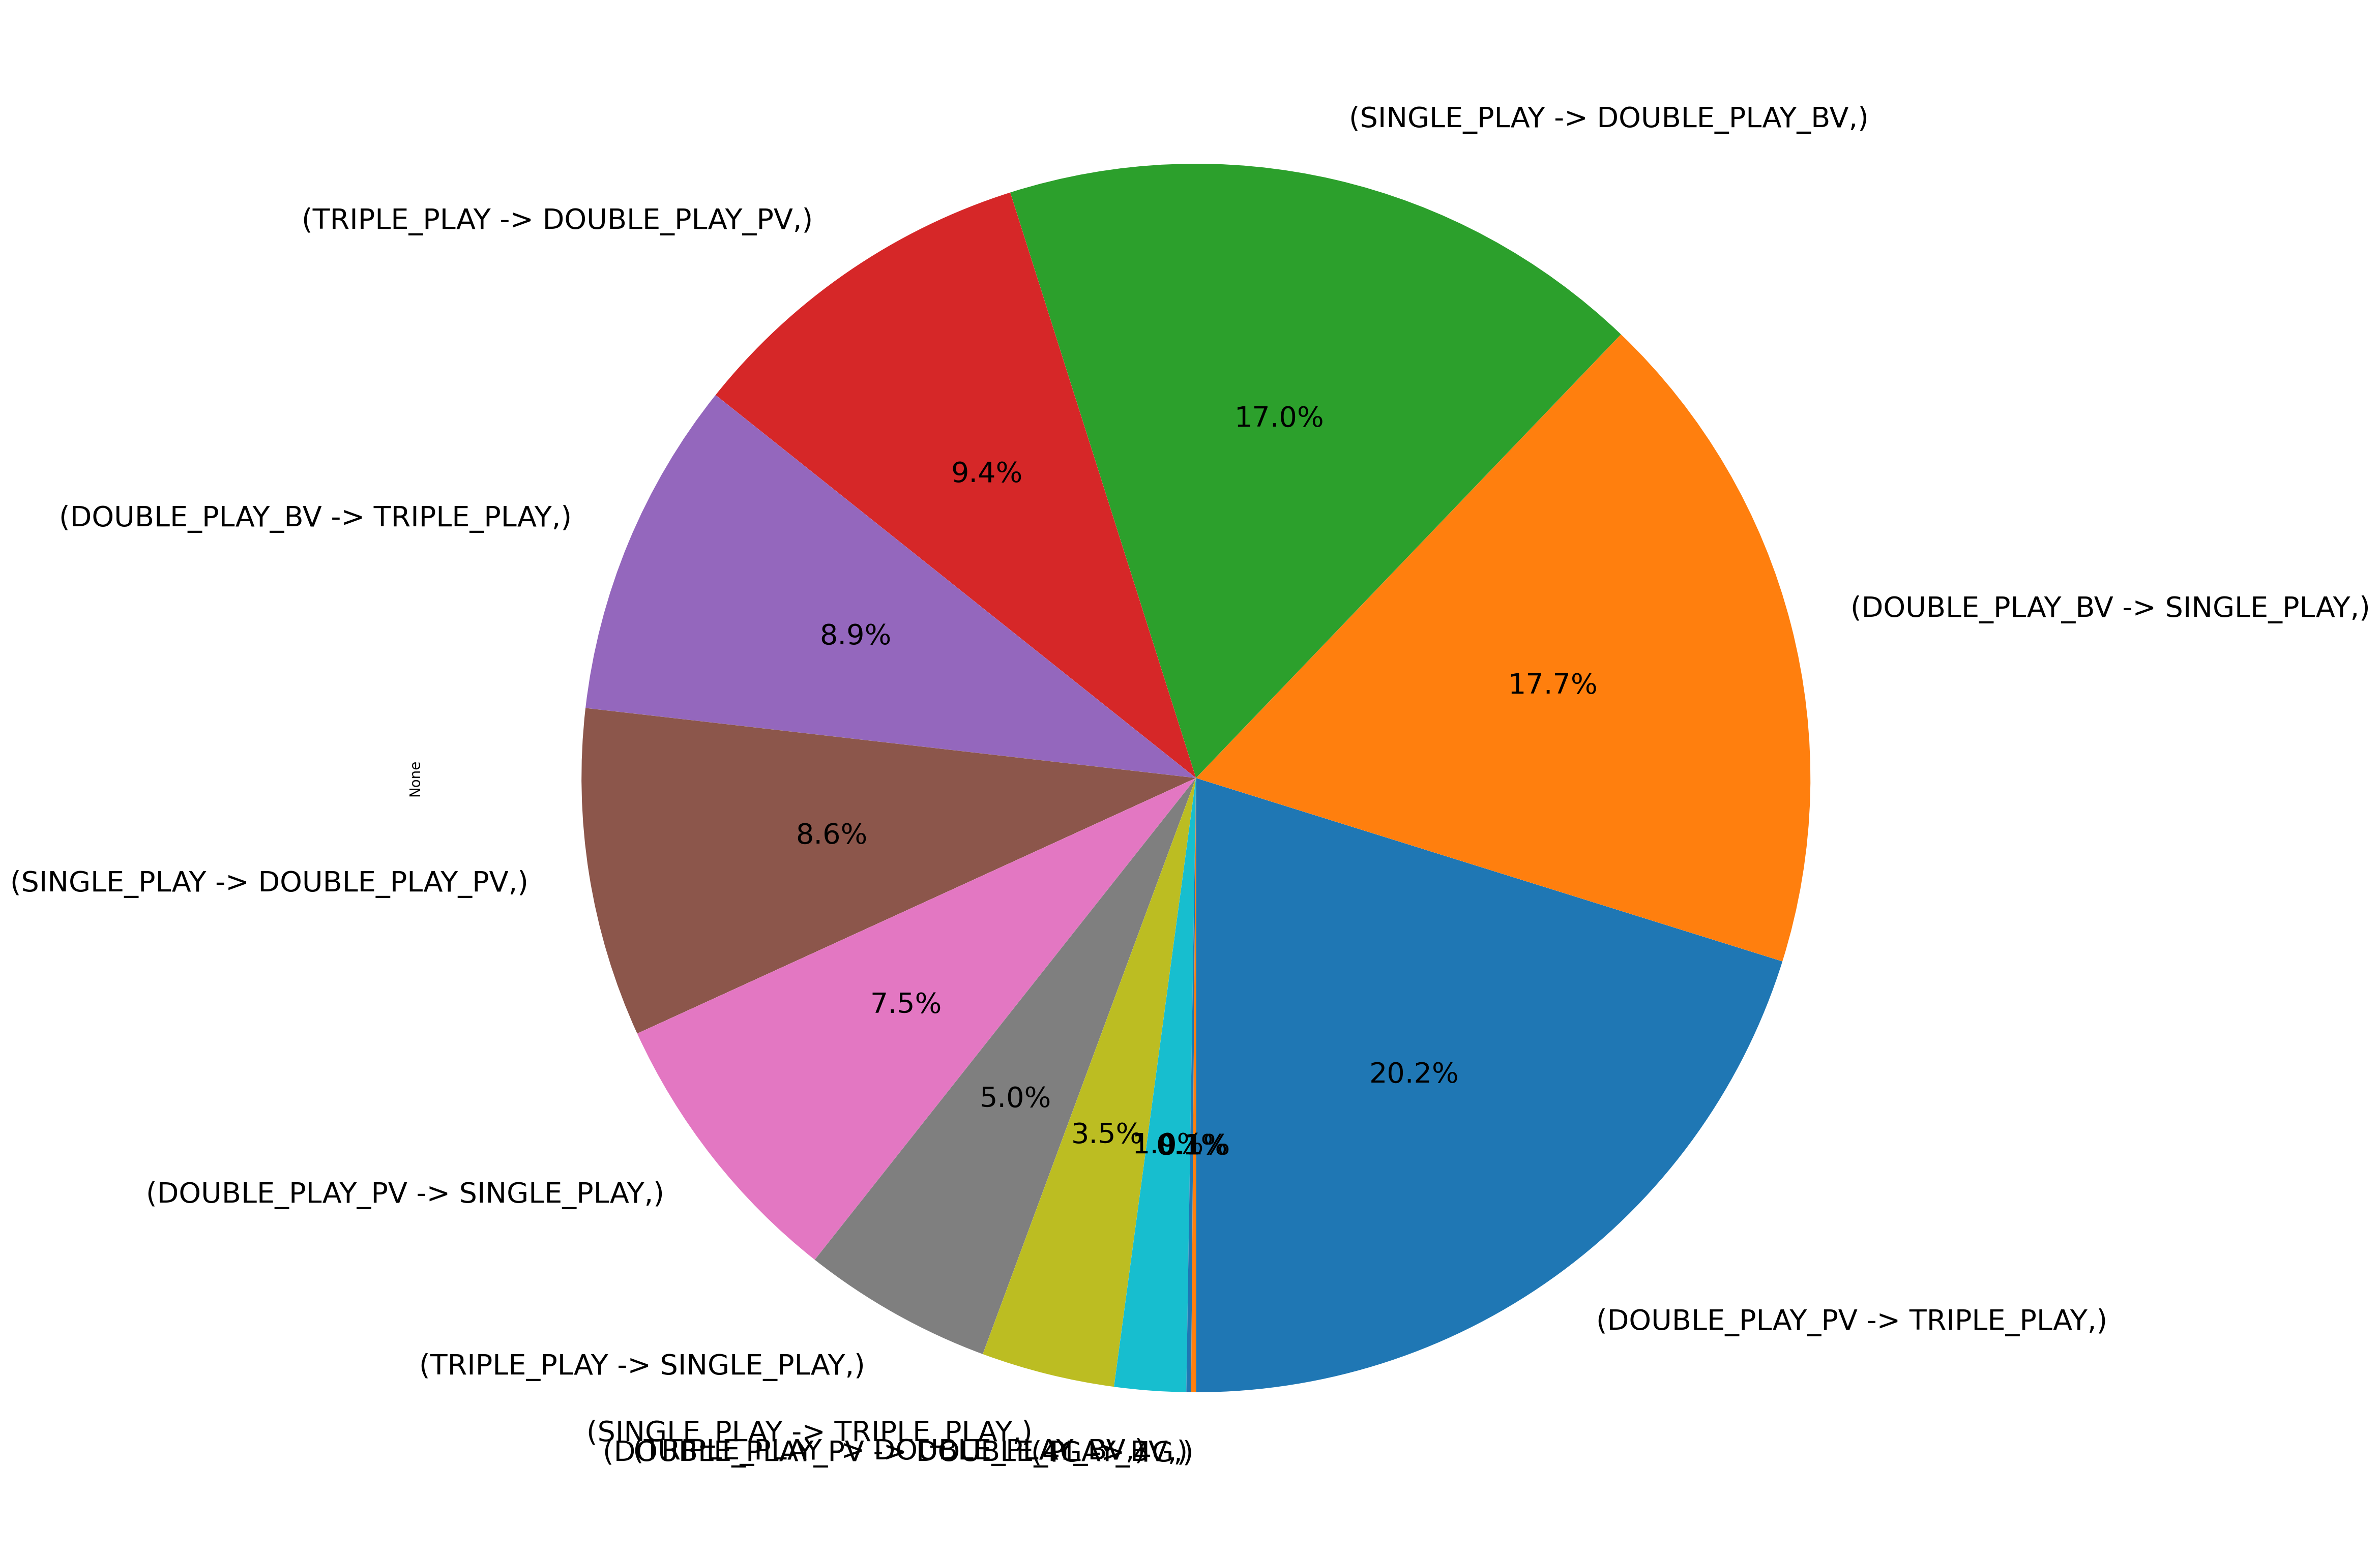

In [1051]:
fig = plt.figure(figsize=(20,20), dpi=200)
ax = plt.subplot(111)

voice_udf[["Sub_Update"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=20)

In [1052]:
#cat_cols = ['ONNET_OUTGOING_Categorical', 'ONNET_INCOMING_Categorical', 'OFFNET_OUTGOING_Categorical', 'OFFNET_INCOMING_Categorical',
            #'IDD_INCOMING_Categorical','IDD_OUTGOING_Categorical','Peo_TV_Package', 'PEO_TV_Categorical','BB_Categorical',
          # 'IDD_OUTGOING_Outlier','OFFNET_OUTGOING_Outlier','ONNET_OUTGOING_Outlier','ONNET_INCOMING_Outlier','ONNET_INCOMING_Outlier'
           #,'IDD_INCOMING_Outlier']

#scaled_cols = ['ONNET_OUTGOING_Scaled', 'ONNET_INCOMING_Scaled', 'OFFNET_OUTGOING_Scaled', 'OFFNET_INCOMING_Scaled','IDD_INCOMING_Scaled'
        #,'IDD_OUTGOING_Scaled','PEO_TV_Scaled','BB_Scaled']

#voice_udf[cat_cols] = voice_udf[cat_cols].fillna("NO")

#voice_udf[scaled_cols] = voice_udf[scaled_cols].fillna(0)

In [1053]:
voice_udf.to_csv("data/user_profile/prepared/User_Profile_for_Voice_Analysis.csv")

# Analysis

## Customers with Voice VAS

In [1054]:
usage_df.apply(lambda x: "YES" if  type(x["Voice_VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     23559
YES     3996
dtype: int64

## Customers with PeoTV VAS

In [1055]:
usage_df.apply(lambda x: "YES" if  type(x["Peo_VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     27416
YES      139
dtype: int64

## Customers with BB Vas

In [1056]:
usage_df.apply(lambda x: "YES" if  type(x["BB_VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     21283
YES     6272
dtype: int64

## Customers with Uncategorized VAS

In [1057]:
usage_df.apply(lambda x: "YES" if  type(x["Other_VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     20415
YES     7140
dtype: int64

## Customers with PeoTV Packages

In [1058]:
peo_tv_users = usage_df.apply(lambda x: "YES" if  type(x["Peo_TV_Package"]) == str else "NO", axis=1)
peo_tv_users.value_counts()

NO     26306
YES     1249
dtype: int64

## Customers with at least one product

In [1059]:
users_with_products = usage_df.apply(lambda x: "YES" if type(x["Other_VAS_Package"]) == str or type(x["Voice_VAS_Package"]) == str or type(x["Peo_TV_Package"]) == str or type(x["Peo_VAS_Package"]) == str or type(x["BB_VAS_Package"]) == str else "NO", axis=1)
users_with_products.value_counts()

NO     16344
YES    11211
dtype: int64